<a href="https://colab.research.google.com/github/Ganesh-2250/NLP/blob/main/NLP_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install -q datasets nltk scikit-learn gensim matplotlib seaborn tqdm


In [13]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from tqdm.auto import tqdm
import gensim.downloader as api
from gensim.models import Word2Vec
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
plt.style.use('seaborn-v0_8-darkgrid')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
dataset = load_dataset("ag_news")
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

# Display sample
print(train_df.head())
print("Classes: 0=World, 1=Sports, 2=Business, 3=Sci/Tech")


                                                text  label
0  Wall St. Bears Claw Back Into the Black (Reute...      2
1  Carlyle Looks Toward Commercial Aerospace (Reu...      2
2  Oil and Economy Cloud Stocks' Outlook (Reuters...      2
3  Iraq Halts Oil Exports from Main Southern Pipe...      2
4  Oil prices soar to all-time record, posing new...      2
Classes: 0=World, 1=Sports, 2=Business, 3=Sci/Tech


In [15]:
def lowercase_text(text):
    return text.lower()

sample = train_df['text'][0]
print("Original:", sample)
print("\nAfter Lowercasing:", lowercase_text(sample))


Original: Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.

After Lowercasing: wall st. bears claw back into the black (reuters) reuters - short-sellers, wall street's dwindling\band of ultra-cynics, are seeing green again.


In [16]:
def remove_urls(text):
    return re.sub(r"http\S+|www\S+", "", text)

sample2 = "Visit our website at https://example.com for more info!"
print("Before:", sample2)
print("\nAfter URL removal:", remove_urls(sample2))


Before: Visit our website at https://example.com for more info!

After URL removal: Visit our website at  for more info!


In [17]:
def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)

sample3 = "<p>This is <b>bold</b> and <i>italic</i></p>"
print("Before:", sample3)
print("\nAfter HTML removal:", remove_html_tags(sample3))


Before: <p>This is <b>bold</b> and <i>italic</i></p>

After HTML removal: This is bold and italic


In [18]:
def remove_special_chars(text):
    return re.sub(r'[^A-Za-z0-9\s]', '', text)

sample4 = "Hello!!! This @text has #special$ characters%."
print("Before:", sample4)
print("\nAfter punctuation removal:", remove_special_chars(sample4))


Before: Hello!!! This @text has #special$ characters%.

After punctuation removal: Hello This text has special characters


In [19]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Download 'punkt_tab' resource
import nltk
nltk.download('punkt_tab')

def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    filtered = [w for w in words if w.lower() not in stop_words]
    return ' '.join(filtered)

sample5 = "This is an example showing the removal of stop words."
print("Before:", sample5)
print("\nAfter stopword removal:", remove_stopwords(sample5))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Before: This is an example showing the removal of stop words.

After stopword removal: example showing removal stop words .


In [20]:
stemmer = PorterStemmer()

def stem_text(text):
    tokens = nltk.word_tokenize(text)
    stemmed = [stemmer.stem(w) for w in tokens]
    return ' '.join(stemmed)

sample6 = "Computationally computers computing computed"
print("Before:", sample6)
print("\nAfter Stemming:", stem_text(sample6))


Before: Computationally computers computing computed

After Stemming: comput comput comput comput


In [21]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(w) for w in tokens]
    return ' '.join(lemmas)

sample7 = "Better cars running faster than others"
print("Before:", sample7)
print("\nAfter Lemmatization:", lemmatize_text(sample7))


Before: Better cars running faster than others

After Lemmatization: Better car running faster than others


In [22]:
def tokenize_text(text):
    return nltk.word_tokenize(text)

sample8 = "Tokenization splits sentences into words."
print("Original:", sample8)
print("\nTokens:", tokenize_text(sample8))


Original: Tokenization splits sentences into words.

Tokens: ['Tokenization', 'splits', 'sentences', 'into', 'words', '.']


In [23]:
def preprocess_pipeline(text):
    text = lowercase_text(text)
    text = remove_urls(text)
    text = remove_html_tags(text)
    text = remove_special_chars(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text)
    return text

train_df['clean_text'] = train_df['text'].apply(preprocess_pipeline)
test_df['clean_text'] = test_df['text'].apply(preprocess_pipeline)

train_df[['text','clean_text']].head()


,text,clean_text
0,Wall St. Bears Claw Back Into the Black (Reute...,wall st bear claw back black reuters reuters s...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,carlyle look toward commercial aerospace reute...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,oil economy cloud stock outlook reuters reuter...
3,Iraq Halts Oil Exports from Main Southern Pipe...,iraq halt oil export main southern pipeline re...
4,"Oil prices soar to all-time record, posing new...",oil price soar alltime record posing new menac...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('clean_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['clean_text'].value_counts()
    for x_label, grp in _df_2.groupby('text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('text')
_ = plt.ylabel('clean_text')

In [24]:
vectorizer_bow = CountVectorizer(max_features=50000)
X_train_bow = vectorizer_bow.fit_transform(train_df['clean_text'])
X_test_bow = vectorizer_bow.transform(test_df['clean_text'])

model_bow = LogisticRegression(max_iter=1000)
model_bow.fit(X_train_bow, train_df['label'])

preds_bow = model_bow.predict(X_test_bow)
print("BoW Accuracy:", accuracy_score(test_df['label'], preds_bow))


BoW Accuracy: 0.9073684210526316


In [25]:
vectorizer_tfidf = TfidfVectorizer(max_features=50000)
X_train_tfidf = vectorizer_tfidf.fit_transform(train_df['clean_text'])
X_test_tfidf = vectorizer_tfidf.transform(test_df['clean_text'])

model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_tfidf, train_df['label'])

preds_tfidf = model_tfidf.predict(X_test_tfidf)
print("TF-IDF Accuracy:", accuracy_score(test_df['label'], preds_tfidf))
print("\nClassification Report:\n", classification_report(test_df['label'], preds_tfidf))


TF-IDF Accuracy: 0.9164473684210527

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      1900
           1       0.96      0.98      0.97      1900
           2       0.88      0.88      0.88      1900
           3       0.89      0.90      0.89      1900

    accuracy                           0.92      7600
   macro avg       0.92      0.92      0.92      7600
weighted avg       0.92      0.92      0.92      7600



In [26]:
print("Loading pre-trained GloVe embeddings (100-dim)...")
glove = api.load("glove-wiki-gigaword-100")

def document_vector_glove(text):
    words = nltk.word_tokenize(text)
    vectors = [glove[w] for w in words if w in glove]
    if len(vectors) == 0:
        return np.zeros(100)
    return np.mean(vectors, axis=0)

X_train_glove = np.vstack(train_df['clean_text'].apply(document_vector_glove))
X_test_glove = np.vstack(test_df['clean_text'].apply(document_vector_glove))

model_glove = LogisticRegression(max_iter=1000)
model_glove.fit(X_train_glove, train_df['label'])

preds_glove = model_glove.predict(X_test_glove)
print("GloVe Embedding Accuracy:", accuracy_score(test_df['label'], preds_glove))


Loading pre-trained GloVe embeddings (100-dim)...
[==================================================] 100.0% 128.1/128.1MB downloaded
GloVe Embedding Accuracy: 0.8827631578947368


In [27]:
train_tokens = [nltk.word_tokenize(text) for text in train_df['clean_text']]
model_w2v = Word2Vec(sentences=train_tokens, vector_size=100, window=5, min_count=5, workers=4, sg=1, epochs=10)

def document_vector_w2v(tokens):
    vecs = [model_w2v.wv[w] for w in tokens if w in model_w2v.wv]
    return np.mean(vecs, axis=0) if len(vecs) > 0 else np.zeros(100)

X_train_w2v = np.vstack([document_vector_w2v(t) for t in train_tokens])
X_test_w2v = np.vstack([document_vector_w2v(nltk.word_tokenize(text)) for text in test_df['clean_text']])

model_w2v_lr = LogisticRegression(max_iter=1000)
model_w2v_lr.fit(X_train_w2v, train_df['label'])
preds_w2v = model_w2v_lr.predict(X_test_w2v)

print("Word2Vec Accuracy:", accuracy_score(test_df['label'], preds_w2v))


Word2Vec Accuracy: 0.8914473684210527


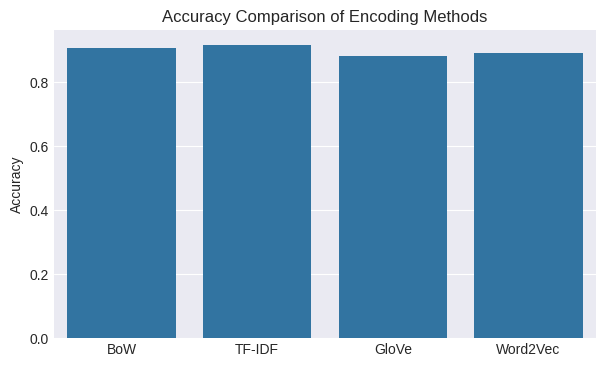

Detailed Results:
BoW: 0.9074
TF-IDF: 0.9164
GloVe: 0.8828
Word2Vec: 0.8914


In [28]:
results = {
    "BoW": accuracy_score(test_df['label'], preds_bow),
    "TF-IDF": accuracy_score(test_df['label'], preds_tfidf),
    "GloVe": accuracy_score(test_df['label'], preds_glove),
    "Word2Vec": accuracy_score(test_df['label'], preds_w2v)
}

plt.figure(figsize=(7,4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Accuracy Comparison of Encoding Methods")
plt.ylabel("Accuracy")
plt.show()

print("Detailed Results:")
for k,v in results.items():
    print(f"{k}: {v:.4f}")
